In [18]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
# Kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Rastgele bir tarih aralığı oluştur
date_range = pd.date_range(start='2024-01-01', end='2024-01-30')

# Örnek veri setini oluştur
np.random.seed(0)  # Sonuçların tutarlı olması için
data = pd.DataFrame({
    'Date': date_range,
    'Dopamine': np.random.uniform(50, 150, len(date_range)),  # 50-150 arası rastgele değerler
    'Serotonin': np.random.uniform(70, 200, len(date_range)),  # 70-200 arası rastgele değerler
    'Oxytocin': np.random.uniform(10, 50, len(date_range)),   # 10-50 arası rastgele değerler
    'Endorphin': np.random.uniform(20, 80, len(date_range)),  # 20-80 arası rastgele değerler
    'Mood': np.random.uniform(1, 10, len(date_range))         # Ruh hali için 1-10 arası rastgele değerler
})

# 'Date' sütununu string formatına dönüştür
data['Date'] = data['Date'].astype(str)

# İlk birkaç satırı görelim
data.head()

# Veri setini bir CSV dosyasına kaydet
data.to_csv("hormone_levels.csv", index=False)

print("CSV dosyası oluşturuldu ve kaydedildi.")


CSV dosyası oluşturuldu ve kaydedildi.


In [21]:
# CSV dosyasını yükleyelim
data = pd.read_csv("hormone_levels.csv")

# Veri setinin ilk birkaç satırına göz atalım
data.head()


,Date,Dopamine,Serotonin,Oxytocin,Endorphin,Mood
0,2024-01-01,104.881350,104.392230,16.358783,39.114137,7.527289
1,2024-01-02,121.518937,170.650380,14.415006,60.044623,5.511919
2,2024-01-03,110.276338,129.299543,36.253184,27.907872,9.604753
3,2024-01-04,104.488318,143.896413,15.527318,62.979632,6.795912
4,2024-01-05,92.365480,72.442674,17.863294,37.364366,4.814695


In [22]:
# Veri yapısını ve sütun bilgilerini görelim
data.info()

# İstatistiksel özet
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       30 non-null     object 
 1   Dopamine   30 non-null     float64
 2   Serotonin  30 non-null     float64
 3   Oxytocin   30 non-null     float64
 4   Endorphin  30 non-null     float64
 5   Mood       30 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.5+ KB


,Dopamine,Serotonin,Oxytocin,Endorphin,Mood
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,108.112033,128.721804,26.730174,52.189193,6.074537
std,28.496365,33.380085,12.140982,16.914028,2.288793
min,52.021840,72.442674,11.567512,20.281729,1.172739
25%,92.713790,102.063472,14.987726,37.484828,4.825751
50%,108.540397,128.158870,23.734167,55.033574,6.387697
75%,129.730018,153.751215,35.738343,63.828639,7.404878
max,147.861834,198.488599,49.070444,77.731313,9.989623


           Dopamine  Serotonin  Oxytocin  Endorphin      Mood
Dopamine   1.000000  -0.093587 -0.045058   0.031449  0.158673
Serotonin -0.093587   1.000000  0.005207   0.027984 -0.337777
Oxytocin  -0.045058   0.005207  1.000000   0.229111 -0.001251
Endorphin  0.031449   0.027984  0.229111   1.000000 -0.137894
Mood       0.158673  -0.337777 -0.001251  -0.137894  1.000000


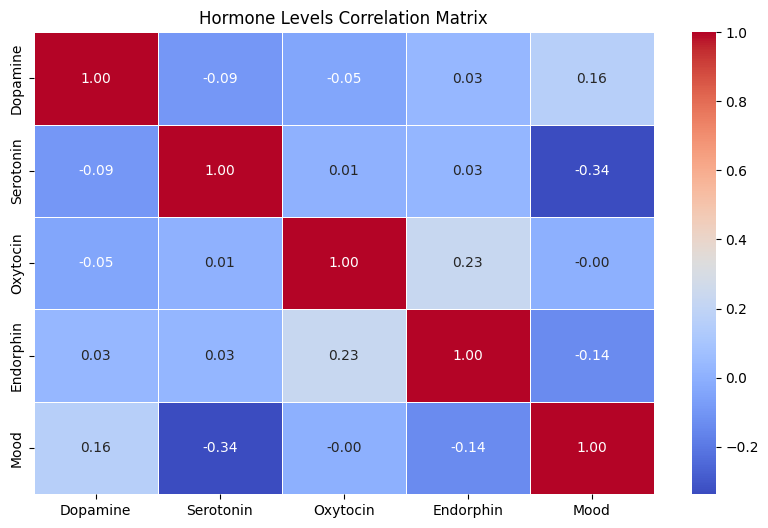

In [23]:
# Sayısal verilerle korelasyon matrisini hesapla
numerical_data = data.drop(columns=['Date'])  # 'Date' sütununu çıkarıyoruz
correlation = numerical_data.corr()

# Korelasyon matrisini yazdır
print(correlation)

# Korelasyon matrisini görselleştirmek için heatmap oluşturuyoruz
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlıyoruz
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Hormone Levels Correlation Matrix')  # Başlık ekliyoruz
plt.show()  # Grafiği gösteriyoruz

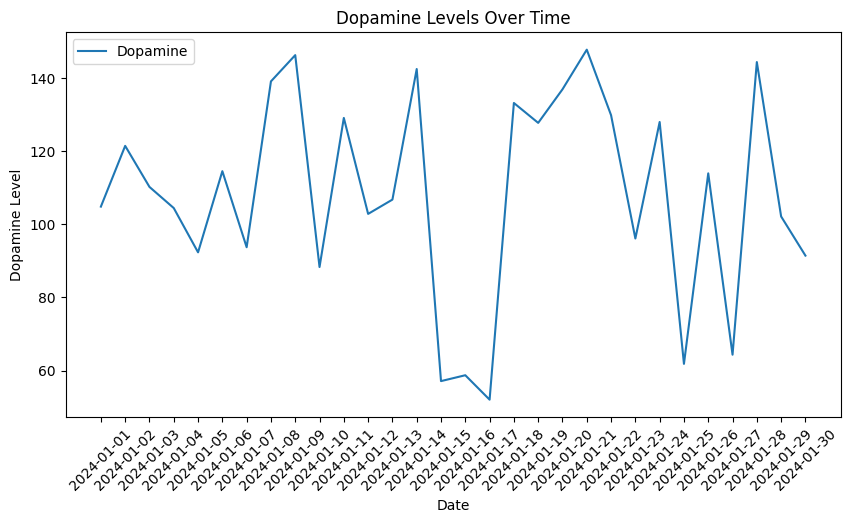

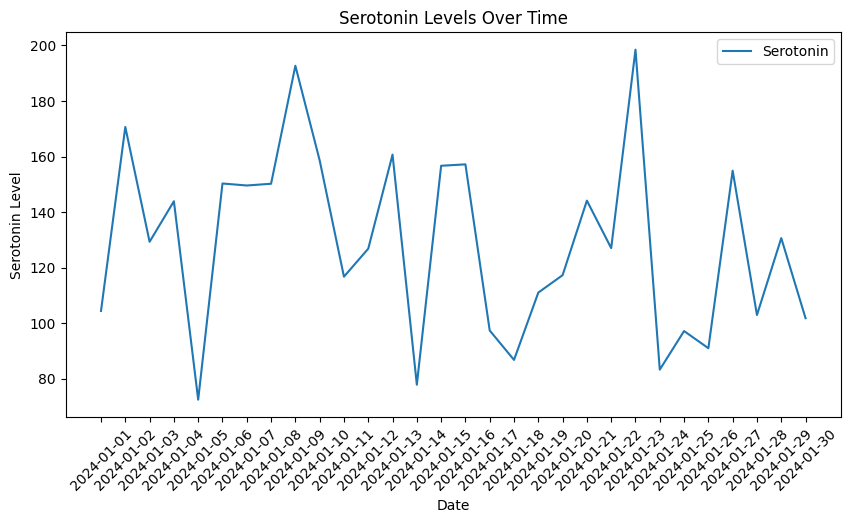

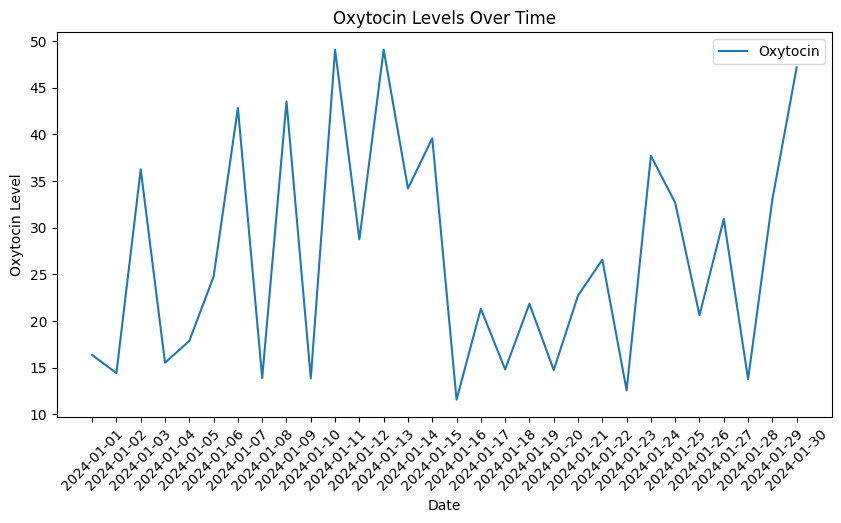

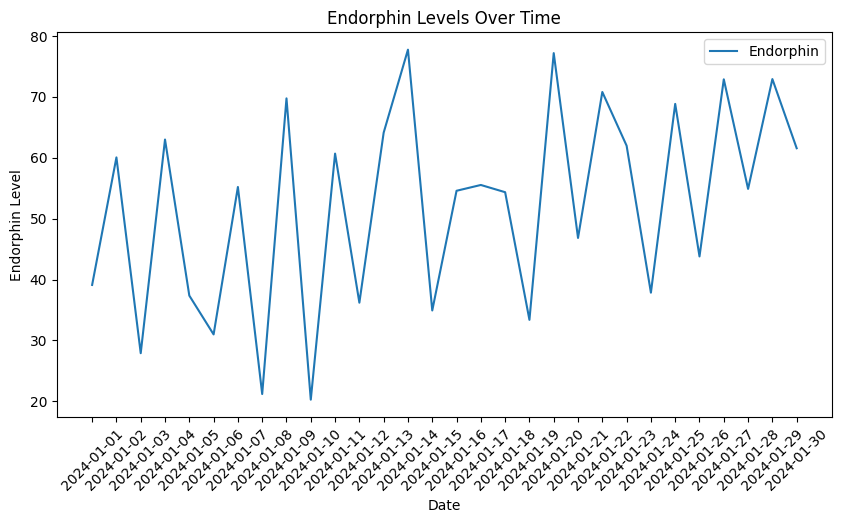

In [24]:
for hormone in ['Dopamine', 'Serotonin', 'Oxytocin', 'Endorphin']:
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data[hormone], label=hormone)
    plt.xlabel('Date')
    plt.ylabel(f'{hormone} Level')
    plt.title(f'{hormone} Levels Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
